In [1]:
import hashlib
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ast
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


np.random.seed(42)
tf.random.set_seed(42)
random.seed(100)

In [2]:
class MinHash:
    def __init__(self, num_hashes=100):
        self.num_hashes = num_hashes
        self.seeds = [random.randint(0, 2**32 - 1) for _ in range(num_hashes)]

    def _hash(self, x, seed):
        return int(hashlib.md5((str(seed) + x).encode('utf8')).hexdigest(), 16)

    def compute(self, set_data):
        min_hashes = [min(self._hash(el, seed) for el in set_data) for seed in self.seeds]
        return min_hashes

    def jaccard_similarity(self, set1, set2):
        min_hash1 = self.compute(set1)
        min_hash2 = self.compute(set2)
        return sum(1 for a, b in zip(min_hash1, min_hash2) if a == b) / self.num_hashes


def hashing(str1, str2):

    n = 3
    set1 = {str1[i:i+n] for i in range(len(str1) - n + 1)}
    set2 = {str2[i:i+n] for i in range(len(str2) - n + 1)}
    minhash = MinHash(num_hashes=100)
    similarity = minhash.jaccard_similarity(set1, set2)
    return(1 - similarity)

def plot_distribution(data):
    if isinstance(data, list):
        data = np.array(data)

    plt.figure(figsize=(10, 6))

    sns.histplot(data, bins=30, kde=True, color='blue', alpha=0.6, stat='density')

    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Distribution of Numbers')

    plt.grid(True)
    plt.show()

def plot_confusion_matrix(model, X_test, y_test):
  y_true = [0 if x < 0.5 else 1 for x in y_test]
  y_pred = [0 if x < 0.5 else 1 for x in model.predict(X_test)]

  cm = confusion_matrix(y_true, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
  disp.plot(cmap=plt.cm.Blues)
  plt.title('Confusion Matrix')
  plt.show()

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# --- load and preprocess ---
file_path = r"F:/binary/final/ms2_per_scan_with_ids.csv"
df = pd.read_csv(file_path)

df_use = df[df['sequence'].notna()].copy()
cast_cols = [c for c in df_use.columns if c.startswith('cast_')]
df_use[cast_cols] = df_use[cast_cols].apply(pd.to_numeric, errors='coerce').fillna(0.0)

X = df_use[cast_cols].to_numpy(dtype=np.float32)
ref_seq = 'MDVFMKGLSKAKEGVVAAAEKTKQGVAEAAGKTKQGVLYVGSKTKEGVVHGVATVAEKTKEQVTNVGGAVVTGVTAVAQKTVEGAGSIAAATGFVKKDQLGKNEEGAPQEGILEDMPVDPDNEAYEMPSEEGYQDYEPEA'
y = np.array([hashing(s, ref_seq) for s in df_use['sequence']], dtype=np.float32)

# --- split ---
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, np.arange(len(df_use)), test_size=0.10, random_state=100
)

# --- extract corresponding Accessions ---
accession_test = df_use.iloc[idx_test]["Accession"].reset_index(drop=True)
print(accession_test.head())


0    P02686-5
1      Q16778
2      Q9UNZ5
3    P02686-6
4    P02686-6
Name: Accession, dtype: object


c:\Users\benja\miniconda3\envs\vae\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.1707 - mae: 0.4011 - val_loss: 0.0761 - val_mae: 0.2168
Epoch 2/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0725 - mae: 0.1928 - val_loss: 0.0599 - val_mae: 0.1434
Epoch 3/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0582 - mae: 0.1376 - val_loss: 0.0559 - val_mae: 0.1331
Epoch 4/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0507 - mae: 0.1248 - val_loss: 0.0472 - val_mae: 0.1217
Epoch 5/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0416 - mae: 0.1121 - val_loss: 0.0354 - val_mae: 0.1055
Epoch 6/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0319 - mae: 0.0985 - val_loss: 0.0245 - val_mae: 0.0907
Epoch 7/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0221 - mae: 0.0838 - val_loss: 0.0177 - val_mae: 0.0726
Epoch 8/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0153 - mae: 0.0671 - val_loss: 0.0147 - val_mae: 0.0611
Epoch 9/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0114 - mae: 0.0548 - 

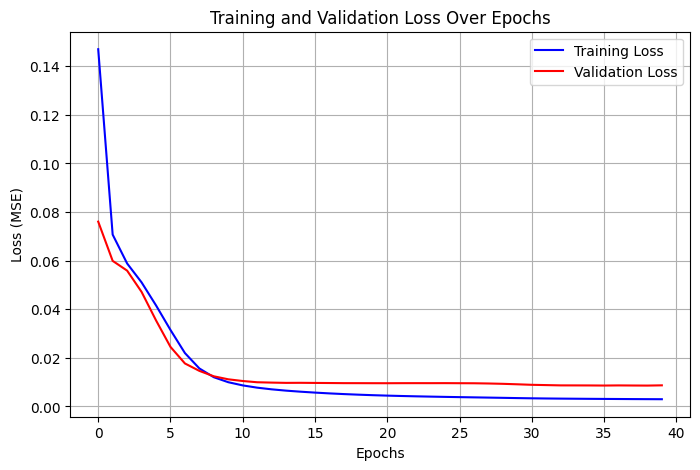

In [4]:

# Define model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(1600,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model and store training history
history = model.fit(X_train, y_train, epochs=40, batch_size=512, validation_split=0.2)

# Evaluate on test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss:.4f}")

# 🎨 Plot loss curve
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


C:\Users\benja\AppData\Local\Temp\ipykernel_6780\2413049309.py:26: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


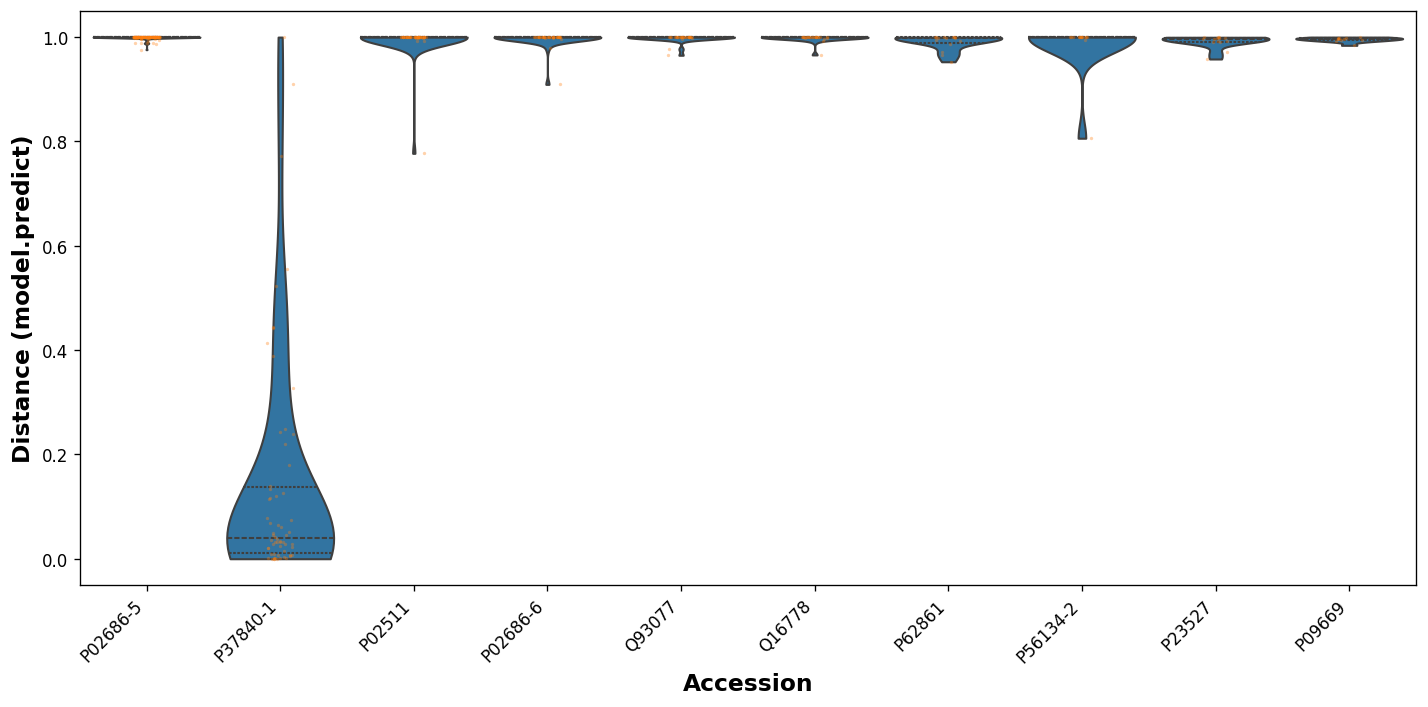

Saved violin plot to: F:/binary/violin_top10_accessions.png


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Optional (nice-looking violins + jitter overlay)
import seaborn as sns

# 1) Predict distances
distance = model.predict(X_test).ravel()  # ensure 1D

# 2) Build plotting DataFrame
df_plot = pd.DataFrame({
    "Accession": pd.Series(accession_test).astype(str).values,
    "distance": distance
})

# 3) Pick top 10 proteins by number of rows (frequency)
top10 = df_plot["Accession"].value_counts().head(10).index.tolist()
df_top = df_plot[df_plot["Accession"].isin(top10)].copy()

# Order accessions by frequency (desc)
order = df_top["Accession"].value_counts().loc[top10].index.tolist()

# 4) Violin plot
plt.figure(figsize=(12, 6), dpi=120)
sns.violinplot(
    data=df_top,
    x="Accession",
    y="distance",
    order=order,
    inner="quartile",   # show quartiles inside each violin
    cut=0,              # don't extend beyond the data range
    scale="width"       # comparable widths
)

# (Optional) Add light jittered points on top for visibility
sns.stripplot(
    data=df_top,
    x="Accession",
    y="distance",
    order=order,
    size=2,
    alpha=0.35
)

#plt.title("Distance distribution per protein (Top 10 by count)")
plt.xlabel("Accession", fontsize=14, weight='bold')
plt.ylabel("Distance (model.predict)", fontsize=14, weight='bold')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Save + show
out_path = r"F:/binary/violin_top10_accessions.png"
plt.savefig(out_path)
plt.show()

print(f"Saved violin plot to: {out_path}")

# If you also want the table used for plotting:
df_top.sort_values(["Accession", "distance"]).to_csv(
    r"F:/binary/violin_top10_accessions_data.csv", index=False
)


In [10]:
import numpy as np
import pandas as pd

# Identify cast columns
cast_cols = [c for c in df.columns if c.startswith('cast_')]

# Convert cast columns to numeric
df[cast_cols] = df[cast_cols].apply(pd.to_numeric, errors='coerce').fillna(0.0)

# Predict using only the cast columns
X = df[cast_cols].to_numpy(dtype=np.float32)
df['Distance'] = model.predict(X)

# Add 'prediction' column based on Distance threshold
df['prediction'] = np.where(df['Distance'] < 0.5, 'ASYN', 'nASYN')

# Drop cast columns before exporting
df_out = df.drop(columns=cast_cols)

# Export to CSV
df_out.to_csv("F:/binary/final/ms2_per_scan_with_ids_hash.csv", index=False)

print("✅ Done. Saved with 'prediction' column → F:/binary/final/ms2_per_scan_with_ids_hash.csv")


604/604 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\benja\AppData\Local\Temp\ipykernel_6780\480890191.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['prediction'] = np.where(df['Distance'] < 0.5, 'ASYN', 'nASYN')


✅ Done. Saved with 'prediction' column → F:/binary/final/ms2_per_scan_with_ids_hash.csv
